In [89]:
import numpy as np
import scipy as sp
import cv2 as cv
import skimage as ski
import matplotlib.pyplot as plt

In [90]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = [16.0, 8.0]

### 1. Дилатація

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<AxesSubplot:title={'center':'binary_dilatation'}>,
 Text(0.5, 1.0, 'binary_dilatation'))

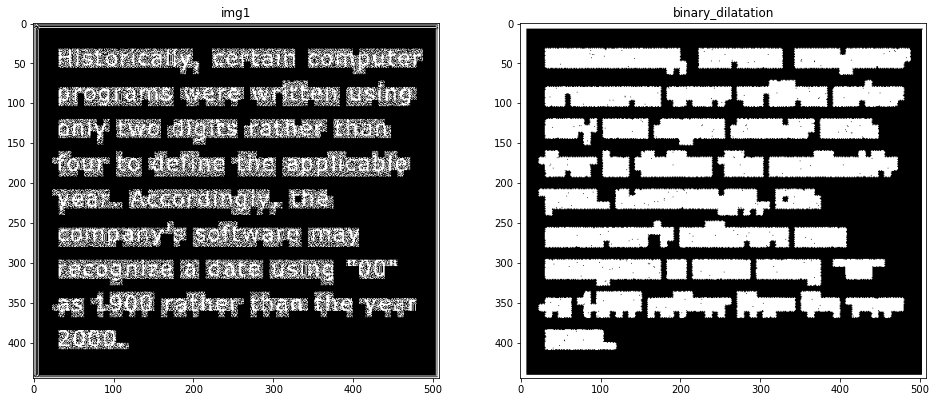

In [91]:
I = {}
I[1] = ski.io.imread('pic.1.jpg') > 0

fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.binary_dilation(I[1], fp)

plt.subplot(121), plt.imshow(I[1]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('binary_dilatation')

Бачимо, що це жипег з артефактами, а не чистеньке зображення. Бінарна дилатація не спрацює. Беремо напівтонову.

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<AxesSubplot:title={'center':'dilatation'}>,
 Text(0.5, 1.0, 'dilatation'))

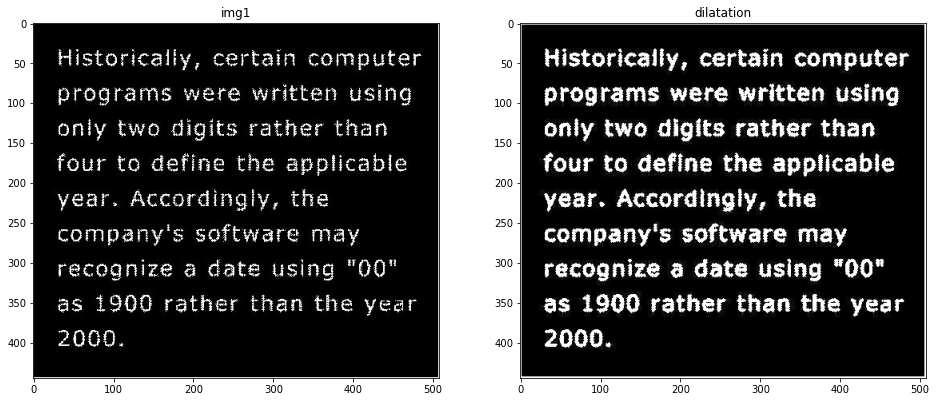

In [92]:
I[1] = ski.io.imread('pic.1.jpg')

fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.dilation(I[1], fp)

plt.subplot(121), plt.imshow(I[1]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('dilatation')

Так краще.

### 2. Ерозія

In [93]:
I[2] = ski.io.imread('pic.2.jpg')
print(I[2].shape)

(258, 258, 3)


Тобто маємо кольорове зображення. Можна перевести у відтінки сірого, але я оброблю покомпонентно

(10, 10)


(<AxesSubplot:title={'center':'erosion (square 10)'}>,
 Text(0.5, 1.0, 'erosion (square 10)'))

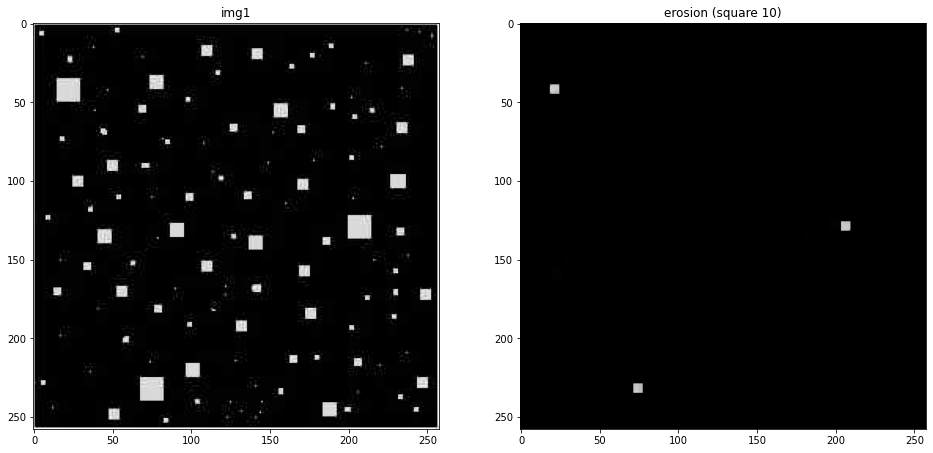

In [94]:
fp = ski.morphology.square(10)
print(fp.shape)
res = np.empty_like(I[2])
for i in range(0,3):
    res[:,:,i] = ski.morphology.erosion(I[2][:,:,i], fp)

plt.subplot(121), plt.imshow(I[2]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('erosion (square 10)')

### 3. Розмикання та замикання
- Розмикання - це ерозія, а потім дилатація
- Замикання - це дилатація, а потім ерозія

Знову маємо кольорове зображення. Тут я вже перейду в грейскейл

(240, 317, 3)
(240, 317)


(<matplotlib.image.AxesImage at 0x1dff54605e0>, None)

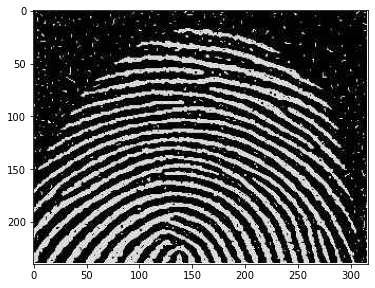

In [95]:
I = ski.io.imread('pic.3.jpg')
print(I.shape)
I = ski.color.rgb2gray(I)
print(I.shape)
plt.imshow(I), plt.gcf().set_size_inches((6,6))

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<matplotlib.image.AxesImage at 0x1dff54b4370>, Text(0.5, 1.0, 'замикання'))

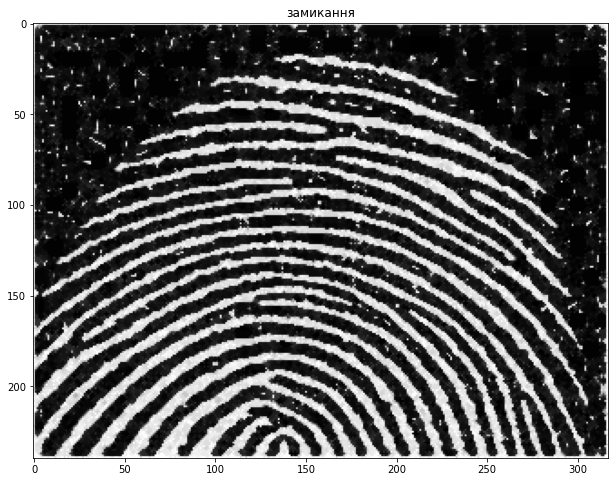

In [96]:
fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.closing(I, fp)
plt.imshow(res), plt.title('замикання')

[[1 1 1]
 [1 1 1]
 [1 1 1]]


(<matplotlib.image.AxesImage at 0x1dff5653220>, Text(0.5, 1.0, 'розмикання'))

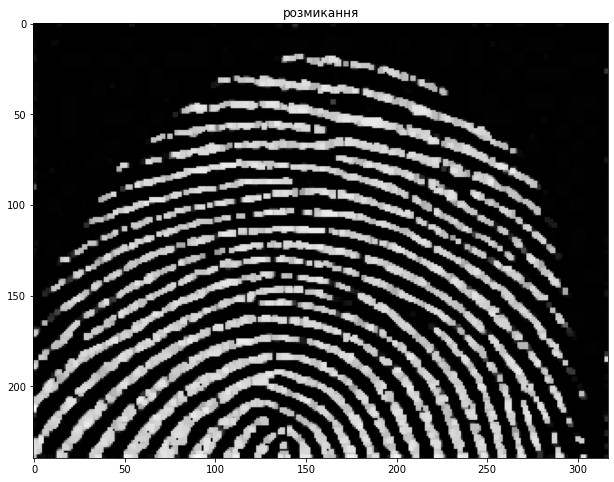

In [97]:
fp = ski.morphology.square(3)
print(fp)
res = ski.morphology.opening(I, fp)
plt.imshow(res), plt.title('розмикання')

### 4. Потоншення


[[1 1 1]
 [1 1 1]
 [1 1 1]]


(<AxesSubplot:title={'center':'thinning'}>,
 Text(0.5, 1.0, 'thinning'))

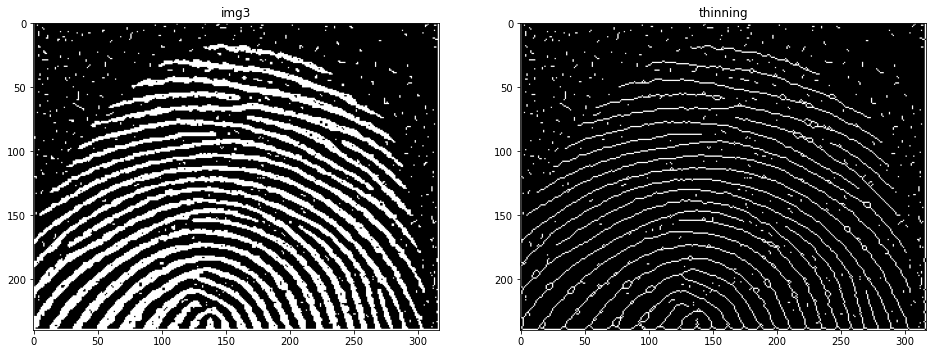

In [121]:
I = ski.color.rgb2gray(ski.io.imread('pic.3.jpg'))
I = I > 0.5 # important!

fp = ski.morphology.square(3)
print(fp)
res = ski.morphology.thin(I)

plt.subplot(121), plt.imshow(I), plt.title('img3')
plt.subplot(122), plt.imshow(res), plt.title('thinning')

### 5. Побудова остова

(<AxesSubplot:title={'center':'skeletonize'}>,
 Text(0.5, 1.0, 'skeletonize'))

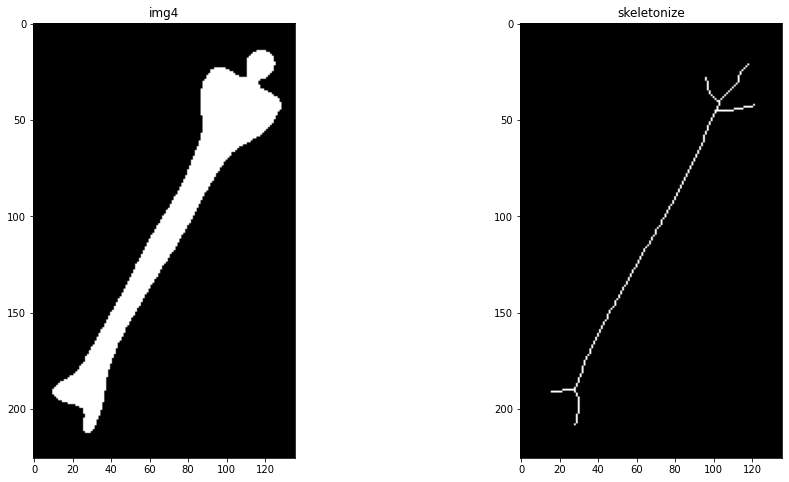

In [124]:
I = ski.color.rgb2gray(ski.io.imread('pic.4.jpg'))
# I = ski.filters.gaussian(I) > 0.5
I = I > 0.5 # important!

res = ski.morphology.skeletonize(I)

plt.subplot(121), plt.imshow(I), plt.title('img4')
plt.subplot(122), plt.imshow(res), plt.title('skeletonize')

## 6. Виділення компонент зв'язності

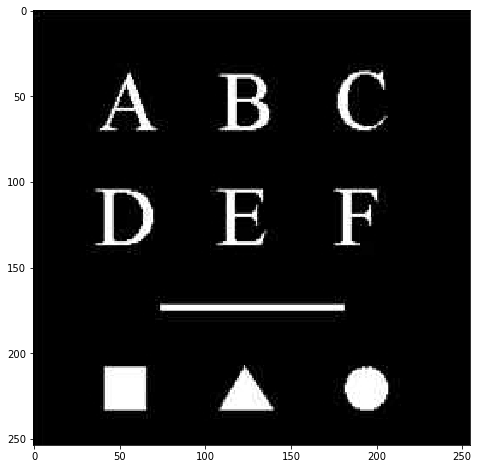

In [230]:
I = ski.color.rgb2gray(ski.io.imread('pic.5.jpg'))
plt.imshow(I, 'gray', interpolation='nearest')

found 10 components


(<AxesSubplot:title={'center':'components'}>,
 Text(0.5, 1.0, 'components'))

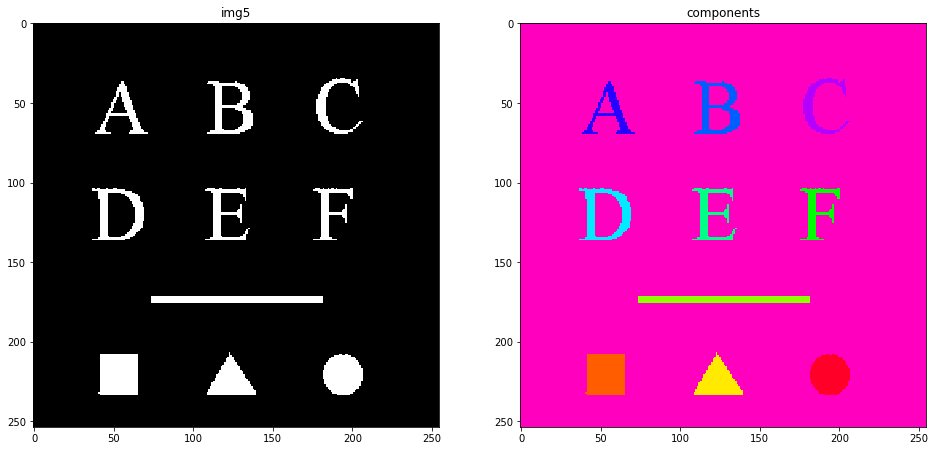

In [231]:
I = I > 0.4
# I = ski.morphology.binary_dilation(I, ski.morphology.diamond(1))

res, n = ski.morphology.label(I, return_num=True)
print('='*20)
print(f"found {n} components")
print('='*20)

plt.subplot(121), plt.imshow(I, 'gray', interpolation='nearest'), plt.title('img5')
plt.subplot(122), plt.imshow(res, 'gist_rainbow_r', interpolation='nearest'), plt.title('components')

### 7. Морфологічна реконструкція 1

(675, 675) (675, 675)


(<AxesSubplot:title={'center':'6b'}>,
 Text(0.5, 1.0, '6b'))

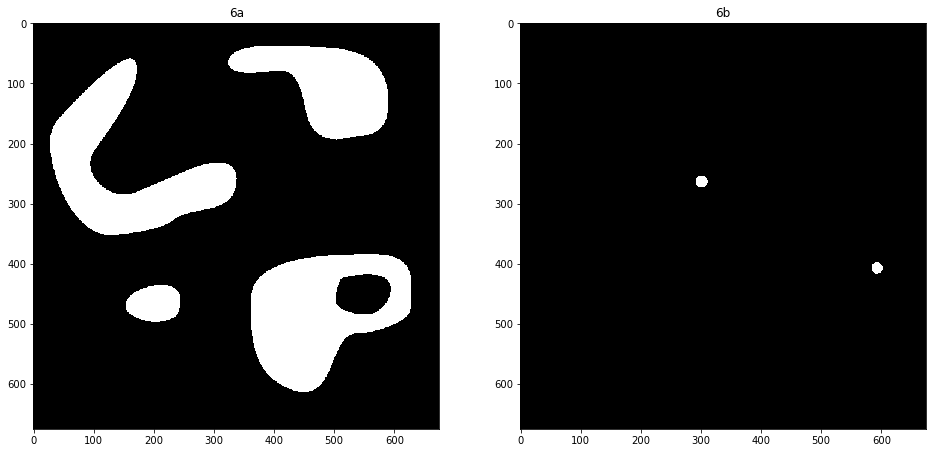

In [233]:
A = ski.io.imread('pic.6a.tif')
B = ski.io.imread('pic.6b.tif') > 128

print(A.shape, B.shape)

plt.subplot(121), plt.imshow(A, 'gray', interpolation='nearest'), plt.title('6a')
plt.subplot(122), plt.imshow(B, 'gray', interpolation='nearest'), plt.title('6b')

(<matplotlib.image.AxesImage at 0x1dfa2885c70>, Text(0.5, 1.0, 'flood fill'))

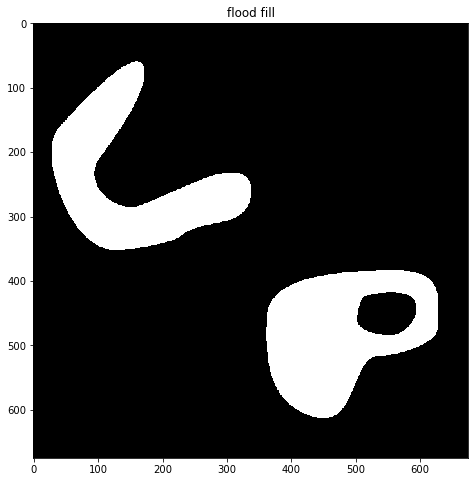

In [235]:
res = ski.morphology.reconstruction(B, A)
plt.imshow(res, 'gray', interpolation='nearest'), plt.title('flood fill')

### 8. Морфологічна реконструкція 2

(<matplotlib.image.AxesImage at 0x1df9df6ff70>,
 <matplotlib.colorbar.Colorbar at 0x1df9dcd9b80>)

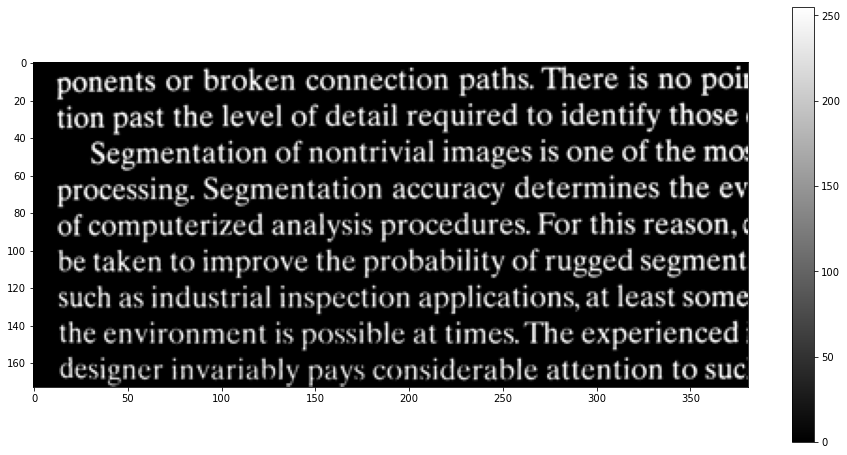

In [375]:
I = ski.io.imread('pic.7.png')
plt.imshow(I, 'gray'), plt.colorbar()

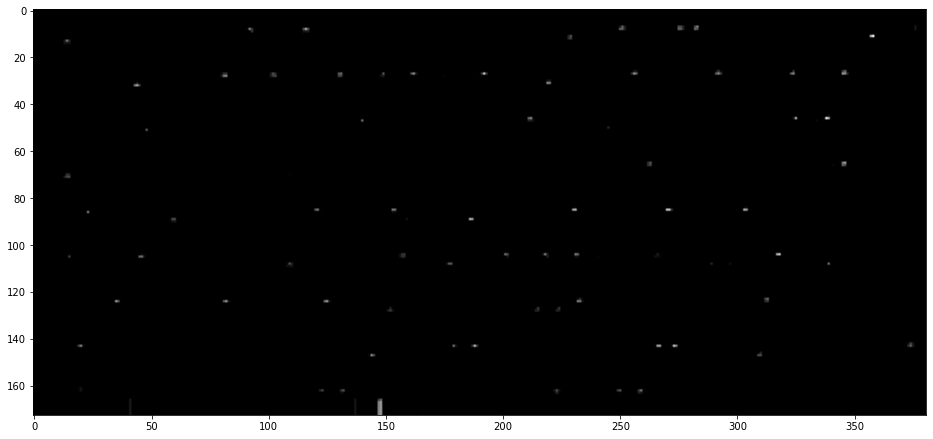

In [357]:
f_a = ski.morphology.erosion(I, np.ones((12,1)))
plt.imshow(f_a, 'gray')

(<matplotlib.image.AxesImage at 0x1df9d170c40>,
 <matplotlib.colorbar.Colorbar at 0x1df9cecca30>)

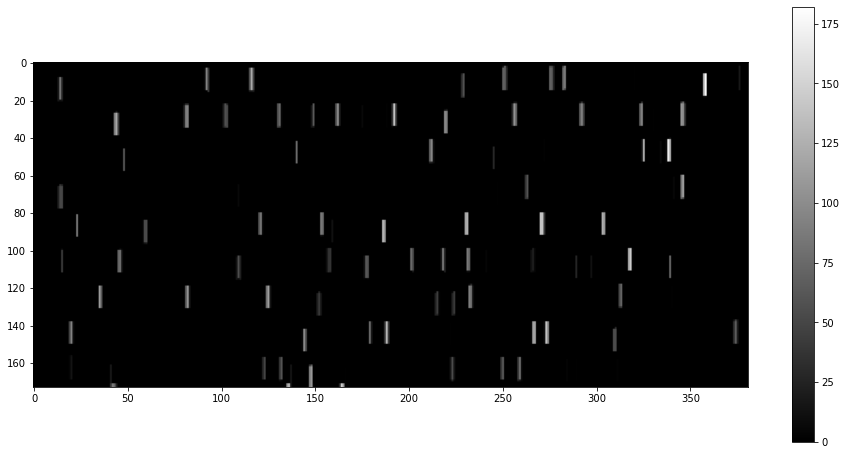

In [365]:
f_a = (ski.morphology.opening(I, 255*np.ones((12,1))))
# f_a = ski.morphology.thin(f_a)
plt.imshow(f_a, 'gray'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x1df9d3f35e0>,
 <matplotlib.colorbar.Colorbar at 0x1df9d411220>)

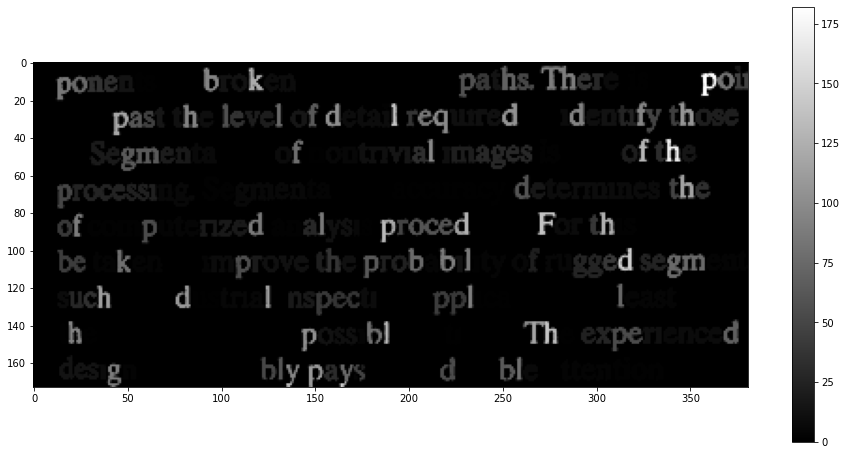

In [368]:
f_obr = ski.morphology.reconstruction(f_a, I)
plt.imshow(f_obr, 'gray'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x1df9d47bdf0>,
 <matplotlib.colorbar.Colorbar at 0x1df9d7e58e0>)

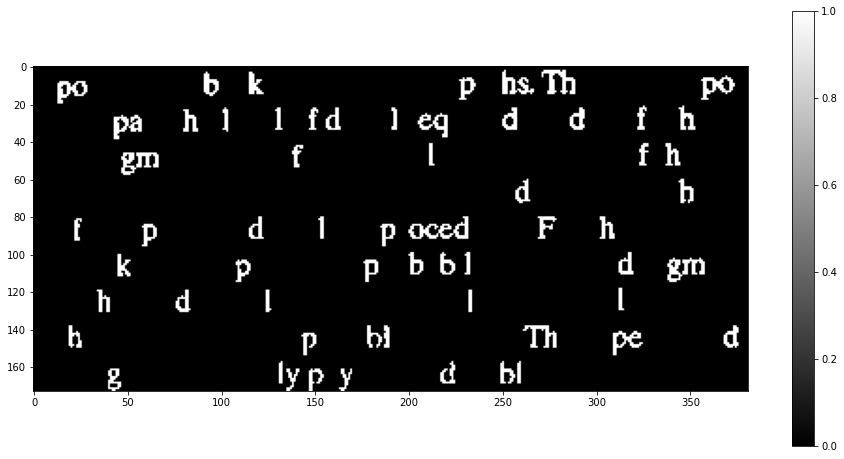

In [369]:
plt.imshow(f_obr > 50, 'gray'), plt.colorbar()

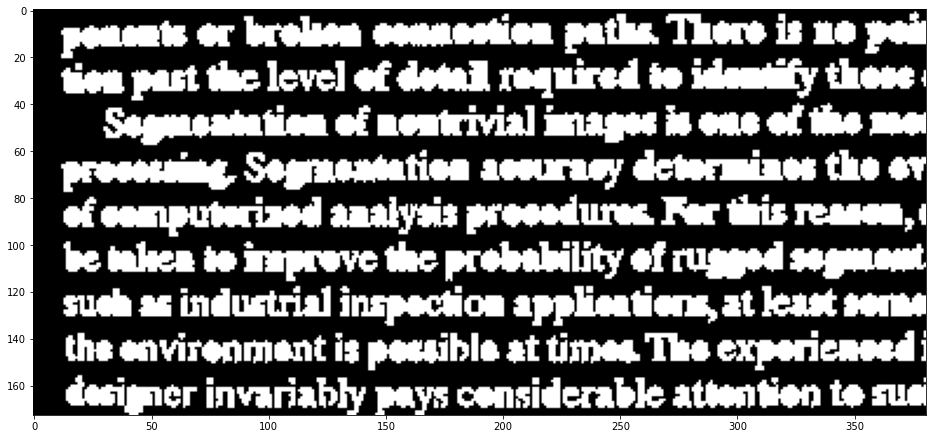

In [376]:
Ic = ski.morphology.remove_small_holes(I, 15)
plt.imshow(Ic, 'gray')

### 9. Напівтонові дилатація та ерозія

(<AxesSubplot:title={'center':'erosion'}>,
 Text(0.5, 1.0, 'erosion'))

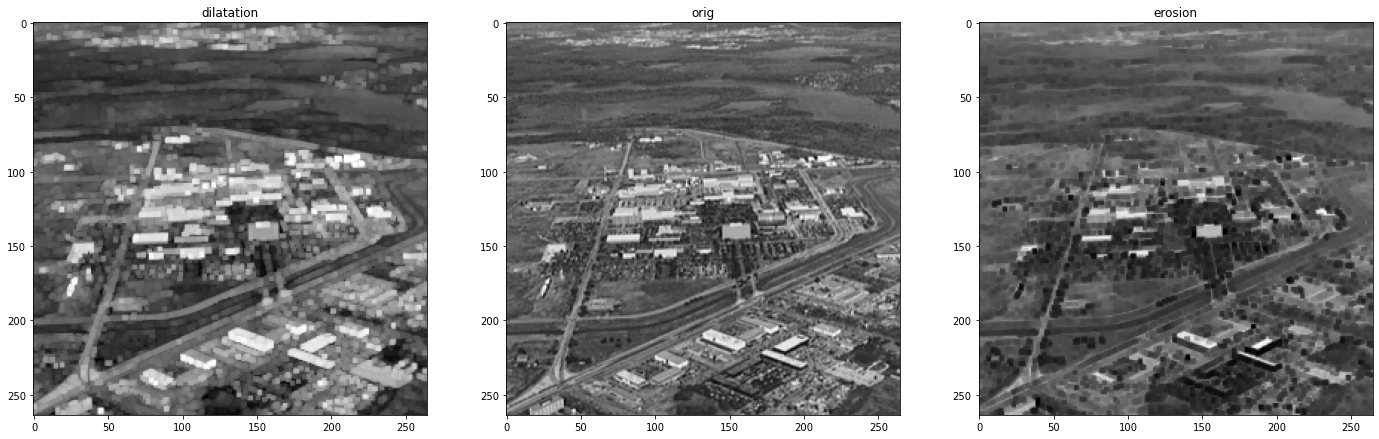

In [383]:
I = ski.io.imread('pic.8.png')

A = ski.morphology.dilation(I, ski.morphology.square(3))
B = ski.morphology.erosion(I, ski.morphology.square(3))

plt.set_cmap('gray')
plt.gcf().set_size_inches((24,12))
plt.subplot(132), plt.imshow(I), plt.title('orig')
plt.subplot(131), plt.imshow(A), plt.title('dilatation')
plt.subplot(133), plt.imshow(B), plt.title('erosion')

### 10. Напівтонове замикання та розмикання

(<AxesSubplot:title={'center':'closing'}>,
 Text(0.5, 1.0, 'closing'))

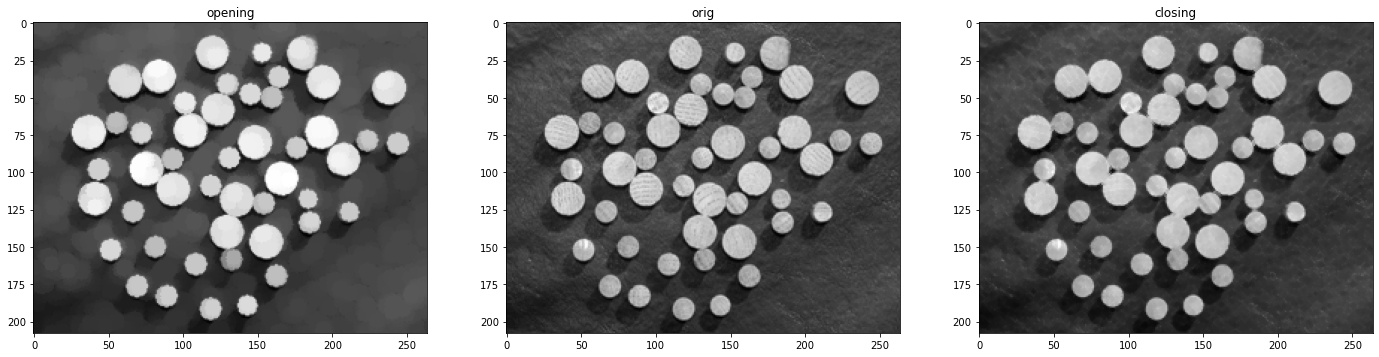

In [390]:
I = ski.io.imread('pic.9.png')

A = ski.morphology.opening(I, ski.morphology.disk(5))
B = ski.morphology.closing(I, ski.morphology.diamond(1))

plt.set_cmap('gray')
plt.gcf().set_size_inches((24,12))
plt.subplot(132), plt.imshow(I), plt.title('orig')
plt.subplot(131), plt.imshow(A), plt.title('opening')
plt.subplot(133), plt.imshow(B), plt.title('closing')

### 11. Gradient

(256, 256)


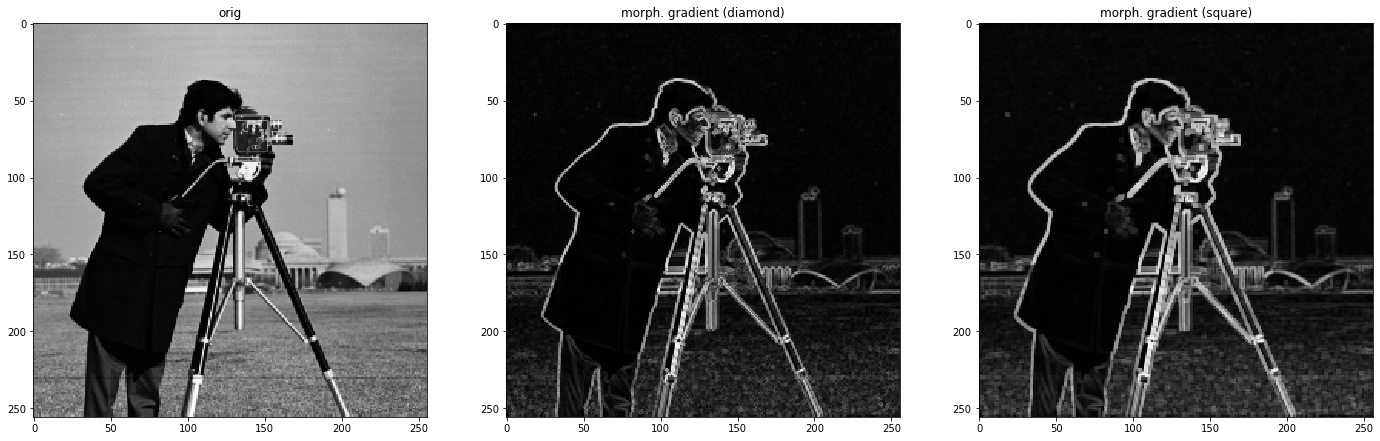

In [402]:
I = ski.io.imread('cameraman.tif')
print(I.shape)

fp1 = ski.morphology.diamond(1)
fp2 = ski.morphology.square(3)
res1 = ski.morphology.dilation(I, fp1) - ski.morphology.erosion(I, fp1)
res2 = ski.morphology.dilation(I, fp2) - ski.morphology.erosion(I, fp2)

plt.rcParams['image.interpolation'] = 'nearest'
plt.subplot(131), plt.imshow(I), plt.title('orig')
plt.subplot(132), plt.imshow(res1), plt.title('morph. gradient (diamond)')
plt.subplot(133), plt.imshow(res2), plt.title('morph. gradient (square)')
plt.gcf().set_size_inches((24,12))


### 12. Перетворення "Виступ" (white tophat)

(256, 256)
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


(<AxesSubplot:title={'center':'white tophat + threshold'}>,
 Text(0.5, 1.0, 'white tophat + threshold'))

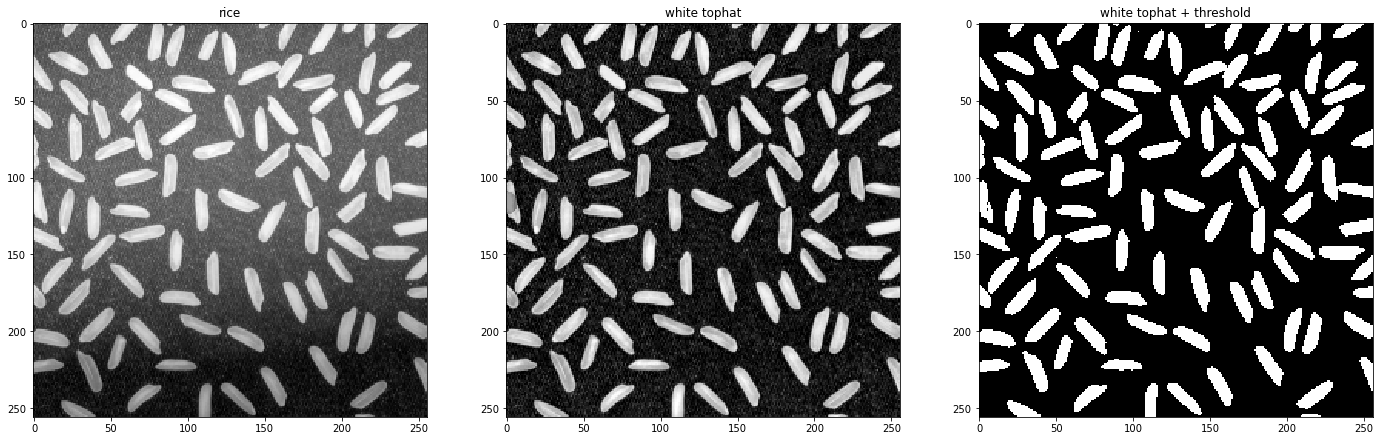

In [427]:
I = ski.io.imread('rice.png')
print(I.shape)

fp = ski.morphology.disk(7)
print(fp)

res = ski.morphology.white_tophat(I, fp)
res_th = res > 50

plt.gcf().set_size_inches((24,12))
plt.subplot(131), plt.imshow(I), plt.title('rice')
plt.subplot(132), plt.imshow(res), plt.title('white tophat')
plt.subplot(133), plt.imshow(res_th), plt.title('white tophat + threshold')

### 13. Морфологічна напівтонова реконструкція

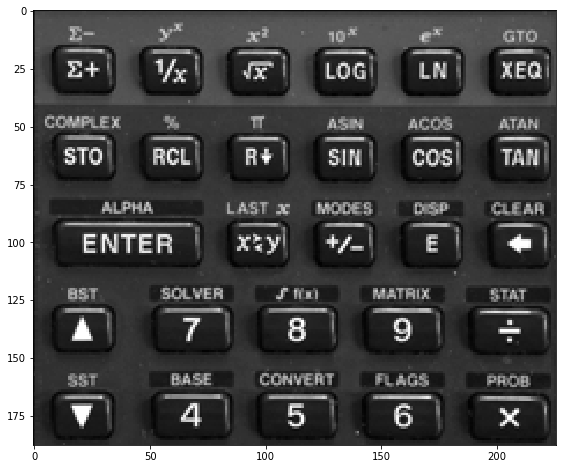

In [428]:
I = ski.io.imread('pic.10.png')
plt.imshow(I)

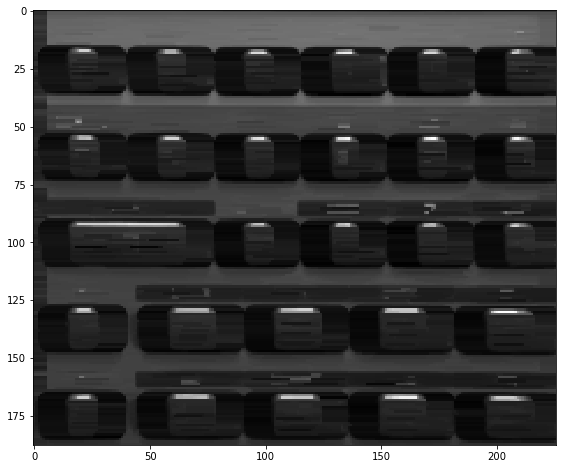

In [527]:
bg_hor = ski.morphology.erosion(I, np.ones((1,12)))
plt.imshow(bg_hor)

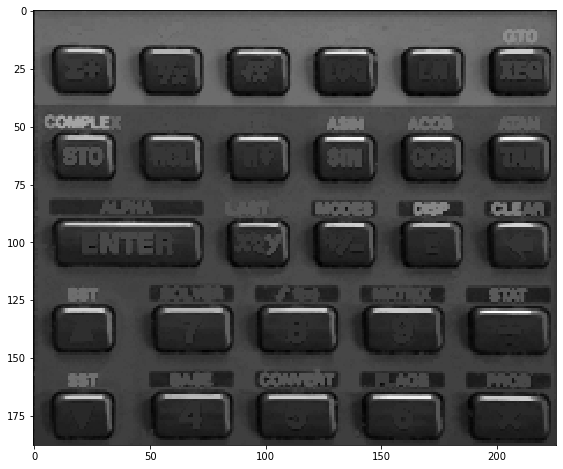

In [528]:
bg0 = ski.morphology.reconstruction(bg_hor, I)
plt.imshow(bg0)

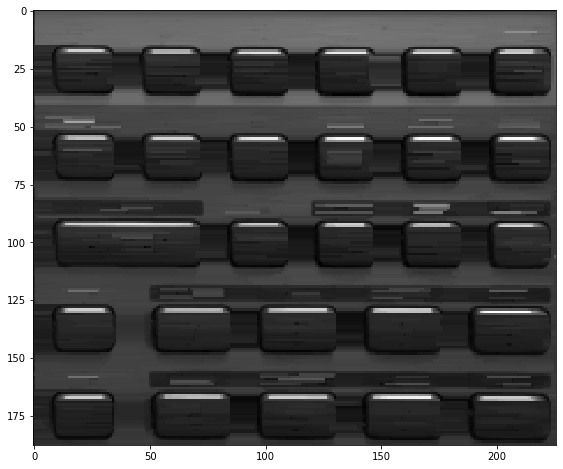

In [529]:
bg1 = ski.morphology.opening(I, np.ones((1,12)))
plt.imshow(bg1)

(<matplotlib.image.AxesImage at 0x1dfc15f4460>,
 <matplotlib.colorbar.Colorbar at 0x1dfc16270a0>)

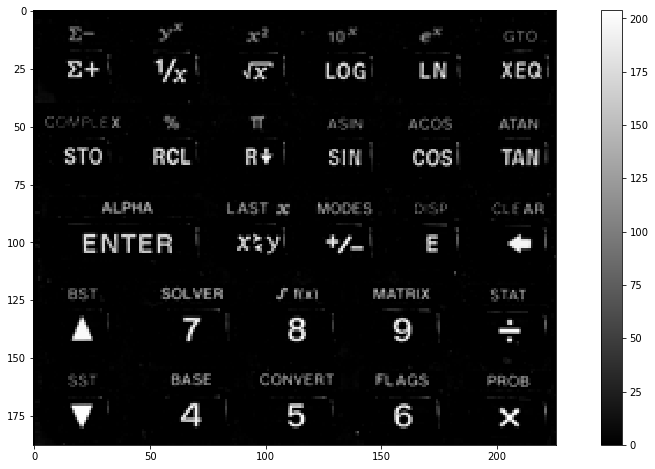

In [530]:
f_thr = I - bg0
plt.imshow(f_thr), plt.colorbar()

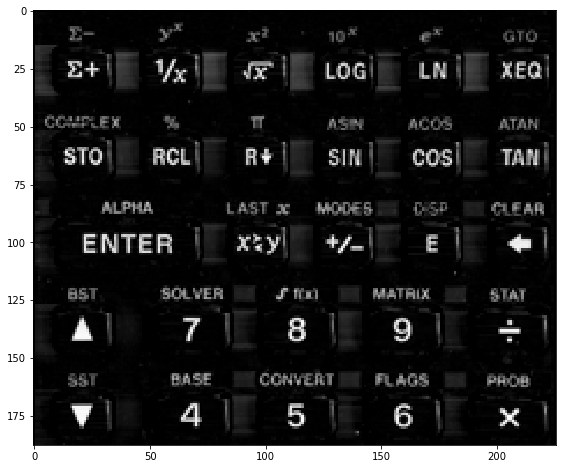

In [531]:
f_thr_bad = I - bg1
plt.imshow(f_thr_bad)

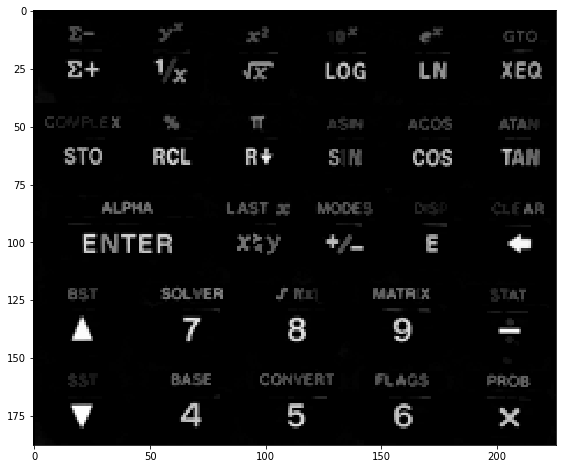

In [532]:
g0 = ski.morphology.reconstruction(
    ski.morphology.erosion(f_thr, np.ones((1,3))), f_thr)
plt.imshow(g0)

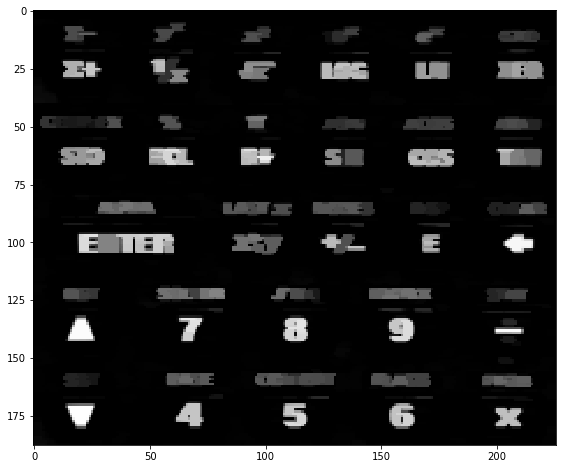

In [533]:
g_dil = ski.morphology.dilation(g0, np.ones((1,4)))
plt.imshow(g_dil)

(<matplotlib.image.AxesImage at 0x1dfc1cc5730>,
 <matplotlib.colorbar.Colorbar at 0x1dfc1cf5670>)

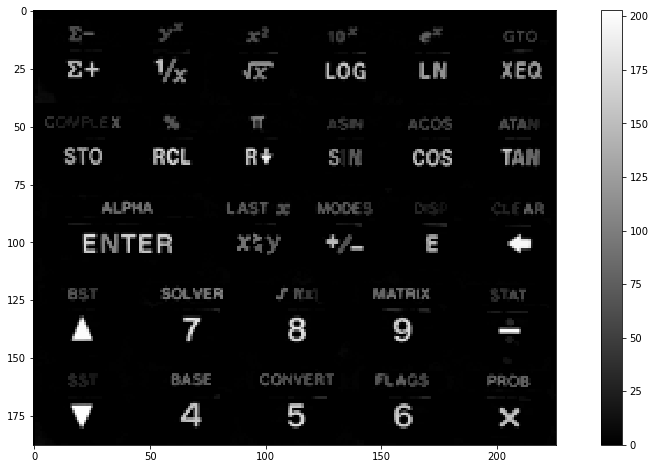

In [535]:
res = ski.morphology.reconstruction(np.minimum(g_dil, f_thr), f_thr)
plt.imshow(res), plt.colorbar()